In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My\ Drive/Colab\ Notebooks/caltech_dataset

/content/drive/My Drive/Colab Notebooks/caltech_dataset


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC            
from skimage import exposure
from skimage import feature
from imutils import paths
import imutils
from sklearn.decomposition import PCA

In [ ]:
	# Function to compute histogram from LBP features
	def compute_lbp(image, eps=1e-7,numPoints=24,radius=8):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, numPoints,
			radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, numPoints + 3),
			range=(0, numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

# Feature extraction   from the training data with the corresponding labels

[INFO] Extracting different features:  Raw Pixel values from image/Color Histogram/HOG/LBP
motorbike


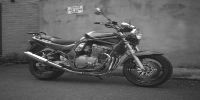

1
1
hog images


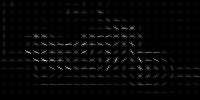

motorbike


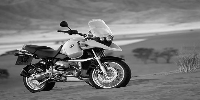

2
2
hog images


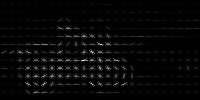

motorbike


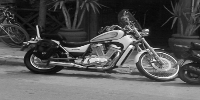

3
3
hog images


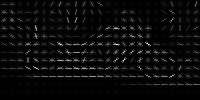

motorbike


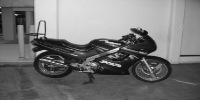

4
4
hog images


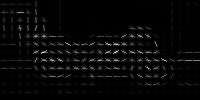

motorbike


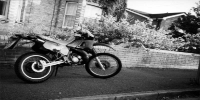

5
5
hog images


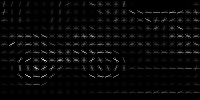

motorbike


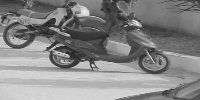

6
6
hog images


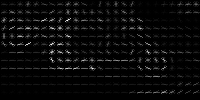

motorbike


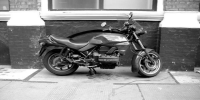

7
7
hog images


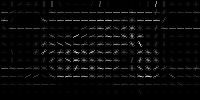

motorbike


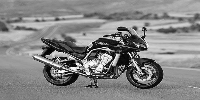

8
8
hog images


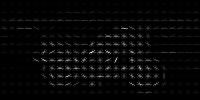

motorbike


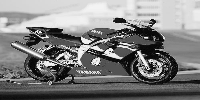

9
9
hog images


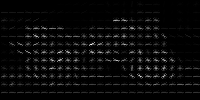

motorbike


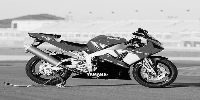

10
10
hog images


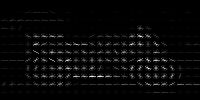

motorbike


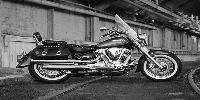

11
11
hog images


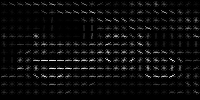

motorbike


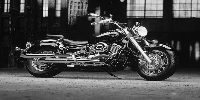

12
12
hog images


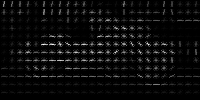

motorbike


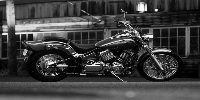

13
13
hog images


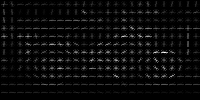

motorbike


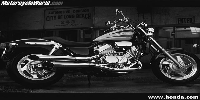

14
14
hog images


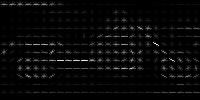

motorbike


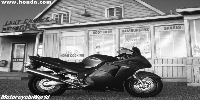

15
15
hog images


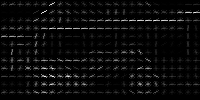

motorbike


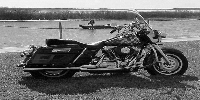

16
16
hog images


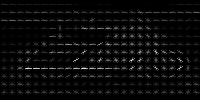

motorbike


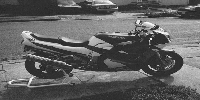

17
17
hog images


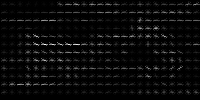

motorbike


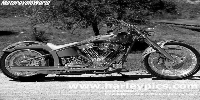

18
18
hog images


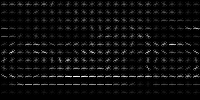

motorbike


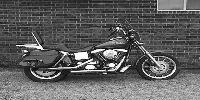

19
19
hog images


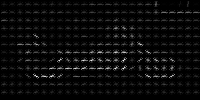

motorbike


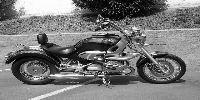

20
20
hog images


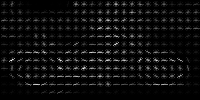

car


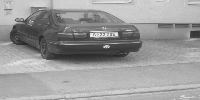

21
21
hog images


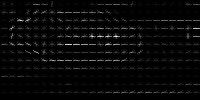

car


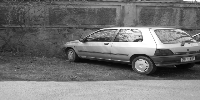

22
22
hog images


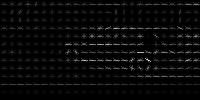

car


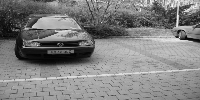

23
23
hog images


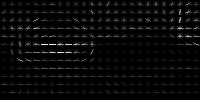

car


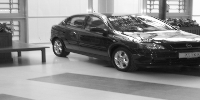

24
24
hog images


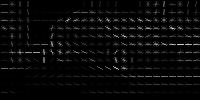

car


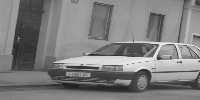

25
25
hog images


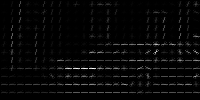

car


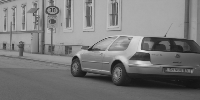

26
26
hog images


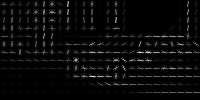

car


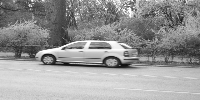

27
27
hog images


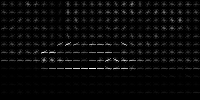

car


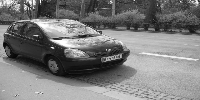

28
28
hog images


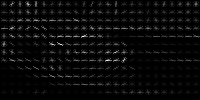

car


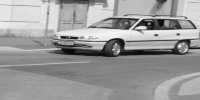

29
29
hog images


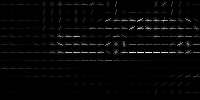

car


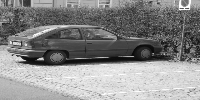

30
30
hog images


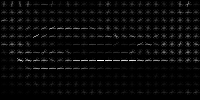

car


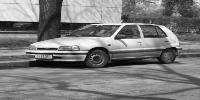

31
31
hog images


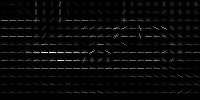

car


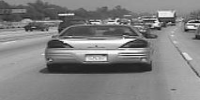

32
32
hog images


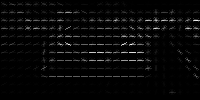

car


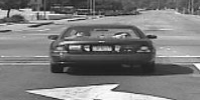

33
33
hog images


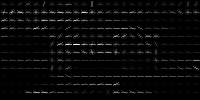

car


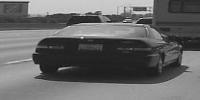

34
34
hog images


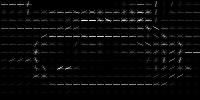

car


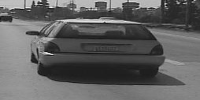

35
35
hog images


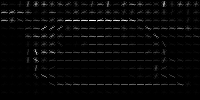

car


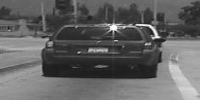

36
36
hog images


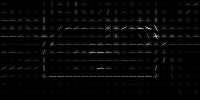

car


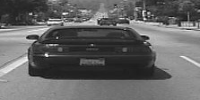

37
37
hog images


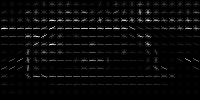

car


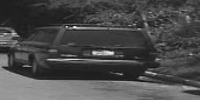

38
38
hog images


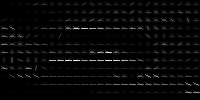

car


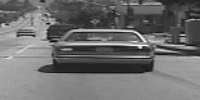

39
39
hog images


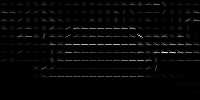

car


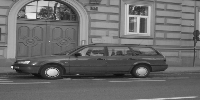

40
40
hog images


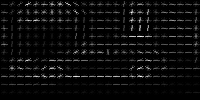

person


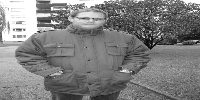

41
41
hog images


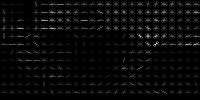

person


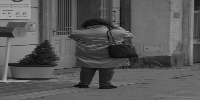

42
42
hog images


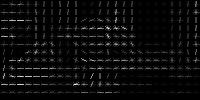

person


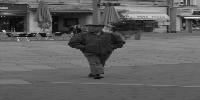

43
43
hog images


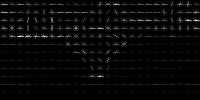

person


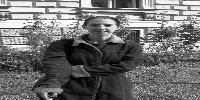

44
44
hog images


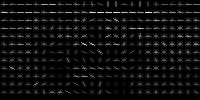

person


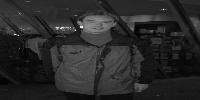

45
45
hog images


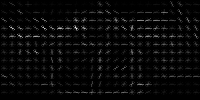

person


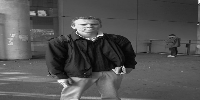

46
46
hog images


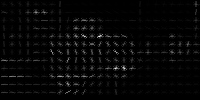

person


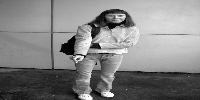

47
47
hog images


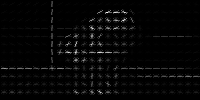

person


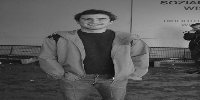

48
48
hog images


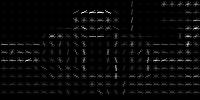

person


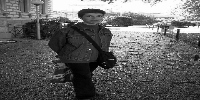

49
49
hog images


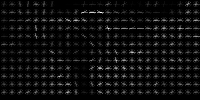

person


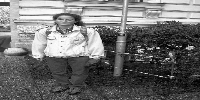

50
50
hog images


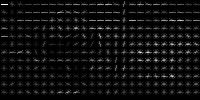

person


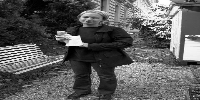

51
51
hog images


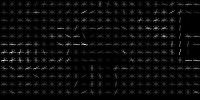

person


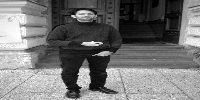

52
52
hog images


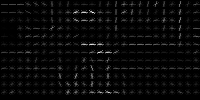

person


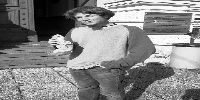

53
53
hog images


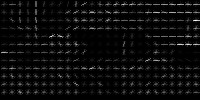

person


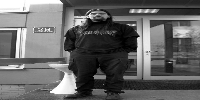

54
54
hog images


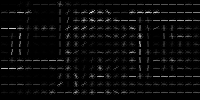

person


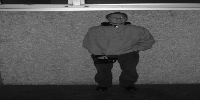

55
55
hog images


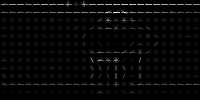

person


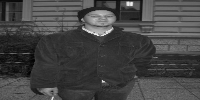

56
56
hog images


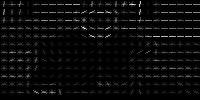

person


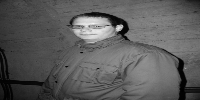

57
57
hog images


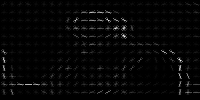

person


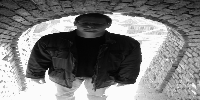

58
58
hog images


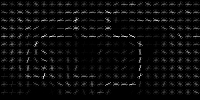

person


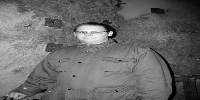

59
59
hog images


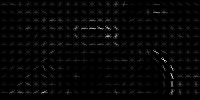

person


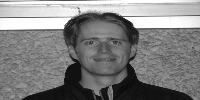

60
60
hog images


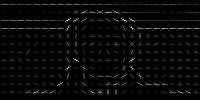

In [ ]:
print("[INFO] Extracting different features:  Raw Pixel values from image/Color Histogram/HOG/LBP")
x_train_hog=[]
x_train_lbp=[]
x_train_hsv=[]
x_train_image=[]
y_train=[]

for imagePath in paths.list_images('train_set'):
 
  # Retrieve the name of the class from each image path 
  image_label=imagePath.split('/',3)[1]
  print (image_label)
  y_train.append(image_label)

  #Display the image
  image=cv2.imread(imagePath)
  #Make images with same size
  image=cv2.resize(image,(200,100))
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray_image)

  #Discripteur image
  v=gray_image.flatten()
  x_train_image.append(v)

  #Test if they have same size 
  print (len(x_train_image))
  print (len(y_train))

  #HOG
  (H, hogImage) = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2),transform_sqrt=True, block_norm="L1",visualize=True)
  hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")
  print ("hog images")


  #TODO: Display HOG image
  cv2_imshow(hogImage)
  x_train_hog.append(H)
    
  #LBP
  v_lbp=compute_lbp(gray_image)
  x_train_lbp.append(v_lbp)

  #HSV
  image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist1=cv2.calcHist([image_hsv], [0, 1],None, [180, 256], [0, 180, 0, 256])
  hist1_flat=hist1.flatten()
  x_train_hsv.append(hist1_flat)


  

In [ ]:
x_train_image

In [ ]:
y_train

In [ ]:
x_train_lbp

In [ ]:
x_train_hsv

In [ ]:
#TODO: Print the size of each feature vector 
#...

# Feature extraction from the testing data with the corresponding labels

motorbike


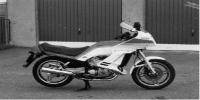

motorbike


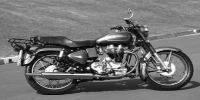

motorbike


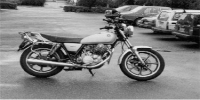

motorbike


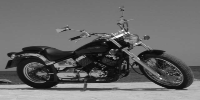

motorbike


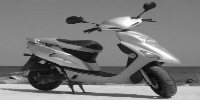

person


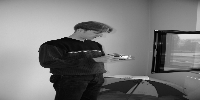

person


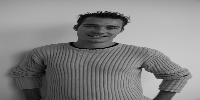

person


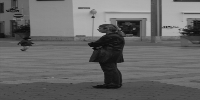

person


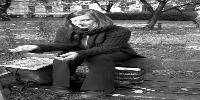

person


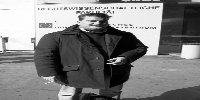

car


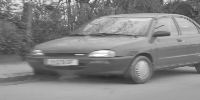

car


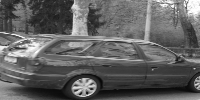

car


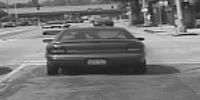

car


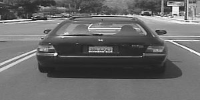

car


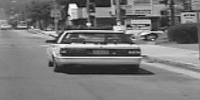

In [ ]:
test_data_image=[]
x_test_hog=[]
x_test_lbp=[]
x_test_hsv=[]
y_test_labels=[]
# compute the different features on the testing set and stock the  corresponding test labels
for imagePath in paths.list_images('test_set'):
 
  # Retrieve the name of the class from each image path 
  image_label_test=imagePath.split('/',3)[1]
  print (image_label_test)
  y_test_labels.append(image_label_test)

  #Display the image
  image=cv2.imread(imagePath)
  #Make images with same size
  image=cv2.resize(image,(200,100))
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray_image)

  #Discripteur image
  v=gray_image.flatten()
  test_data_image.append(v)


  #Discripteur HOG
  (H, hogImage) = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2),transform_sqrt=True, block_norm="L1",visualize=True)
  hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")

  #Append HOG Image To Data test
  
  x_test_hog.append(H)

  #Discripteur LBP
  v_lbp=compute_lbp(gray_image)
  x_test_lbp.append(v_lbp)
    #HSV

  image_hsv_test=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist_test=cv2.calcHist([image_hsv_test], [0, 1],None, [180, 256], [0, 180, 0, 256])
  hist_test_flat=hist_test.flatten()
  x_test_hsv.append(hist_test_flat)
  
  

In [ ]:
test_data_image

[array([228, 229, 223, ..., 177, 177, 219], dtype=uint8),
 array([140, 138, 136, ..., 127, 129, 125], dtype=uint8),
 array([ 86,  67,  67, ..., 191, 194, 199], dtype=uint8),
 array([108, 108, 108, ..., 181, 179, 177], dtype=uint8),
 array([121, 122, 123, ..., 202, 202, 202], dtype=uint8),
 array([128, 130, 131, ...,  59,  58,  58], dtype=uint8),
 array([144, 144, 145, ..., 162, 158, 157], dtype=uint8),
 array([ 99, 101, 100, ...,  78,  79,  79], dtype=uint8),
 array([ 85,  86,  60, ..., 115, 109, 107], dtype=uint8),
 array([250, 250, 250, ...,  41,  38,  48], dtype=uint8),
 array([120, 159, 131, ..., 160, 159, 157], dtype=uint8),
 array([147,  77,  68, ..., 174, 187, 200], dtype=uint8),
 array([160, 174, 163, ..., 107, 104, 104], dtype=uint8),
 array([ 63,  66,  61, ..., 118, 118, 119], dtype=uint8),
 array([126, 124, 121, ..., 136, 136, 135], dtype=uint8)]

# SVM and KNN models

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=1)
model2 = SVC(kernel='linear')

# Train SVM and KNN models and predict the results, evaluate them as well!

In [ ]:
# Train and predict based on model 1, evalute your results as well!
model1.fit(x_train_image, y_train)
predicted_classes1 = model1.predict(test_data_image)
predicted_classes1

print ("Accuracy With KNN: ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy
#TODO: evaluate the obtained results by comparing the predicted classes to the ground truth
#....

Accuracy : 


0.6

In [ ]:
#WITH HOG
model1.fit(x_train_hog, y_train)
predicted_classes1 = model1.predict(x_test_hog)
predicted_classes1

print ("Accuracy With KNN For HOG : ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy

Accuracy With KNN For HOG : 


0.8666666666666667

In [ ]:
#WITH HOG
model2.fit(x_train_hog, y_train)
predicted_classes1 = model2.predict(x_test_hog)
predicted_classes1

print ("Accuracy With KNN For HOG : ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy

Accuracy With KNN For HOG : 


0.9333333333333333

In [ ]:
#WITH LBP
model1.fit(x_train_lbp, y_train)
predicted_classes1 = model1.predict(x_test_lbp)
predicted_classes1

print ("Accuracy With KNN For LBP : ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy

Accuracy With KNN For LBP : 


0.3333333333333333

In [ ]:
#WITH LBP
model2.fit(x_train_lbp, y_train)
predicted_classes1 = model2.predict(x_test_lbp)
predicted_classes1

print ("Accuracy With SVM For LBP : ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy

Accuracy With SVM For LBP : 


0.26666666666666666

In [ ]:
# Train and predict based on model 2, evalute your results as well!model1.fit(x_train_image, y_train)
model2.fit(x_train_image, y_train)
predicted_classes2 = model2.predict(test_data_image)
predicted_classes2

print ("Accuracy  with  SVM: ")
accuracy2=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy2

Accuracy  with  SVM: 


0.6

In [ ]:
#WITH HSV
model1.fit(x_train_hsv, y_train)
predicted_classes1 = model1.predict(x_test_hsv)
predicted_classes1

print ("Accuracy With KNN For HSV : ")
accuracy=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy

Accuracy With KNN For HSV : 


0.4666666666666667

In [ ]:
# Train and predict based on model 2, evalute your results as well!model1.fit(x_train_image, y_train)
model2.fit(x_train_hsv, y_train)
predicted_classes2 = model2.predict(x_test_hsv)
predicted_classes2

print ("Accuracy  with  SVM FOR HSV : ")
accuracy2=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy2

Accuracy  with  SVM FOR HSV : 


0.4666666666666667

# Feature Selection by PCA

In [ ]:
#TODO: Apply PCA  on LBP features, retrain the two models after selection  and predict the results, dont forget to evaluate and to compare regarding the original LBP features

from sklearn.decomposition import PCA
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(x_train_lbp)
X_test_pca = pca.transform(x_test_lbp)

print(X_train_pca)
print(X_test_pca)



[[ 4.30008976e-02  4.67205238e-03 -2.82477863e-03 ...  2.11187630e-04
  -3.11180570e-05  3.15092600e-17]
 [ 3.97328592e-02  3.52114633e-03  5.42296957e-03 ... -4.50878469e-04
  -3.42058291e-04  3.66033922e-17]
 [-2.35877714e-02 -3.70128582e-03  1.45886965e-03 ...  3.72231741e-04
   1.05068617e-04  3.07734937e-17]
 ...
 [-9.18595066e-03  2.85813528e-02 -1.22506064e-02 ... -4.38742684e-04
   2.10128873e-04  2.05366043e-17]
 [ 1.08349477e-03  1.01334200e-02 -1.57083877e-02 ... -5.95351076e-04
  -6.56207208e-04  2.95167027e-17]
 [ 1.21243744e-02  5.28982745e-04 -2.41339145e-03 ... -6.70259605e-04
  -3.11416202e-06  2.96379403e-17]]
[[-4.99501910e-02  2.61982328e-03 -2.74997924e-04 -5.06958470e-03
  -5.53005997e-03 -5.62471945e-03 -5.02468858e-04 -7.35792347e-04
   2.39843880e-03 -1.18561379e-03 -2.10205864e-03 -1.20341349e-03
   9.40226101e-04  6.35677622e-04 -1.38040241e-04 -5.53495601e-04
  -1.67524428e-04  9.48236155e-04 -8.74645582e-05 -9.77656881e-04
   1.12647737e-04  6.27221034e-04 

In [ ]:
model2.fit(X_train_pca, y_train)
predicted_classes1 = model2.predict(X_test_pca)
predicted_classes1

print ("Accuracy  with  PCA: ")
accuracy2=sum(y_test_labels==predicted_classes1)/(len(y_test_labels))
accuracy2

Accuracy  with  PCA: 


0.26666666666666666